<a href="https://colab.research.google.com/github/joedetDS/basketball_longevity/blob/main/Final_(Basketball_Rookie_Longevity).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
# improt preprocessing libraries
import pandas as pd

#for visualization
import seaborn as sns
import matplotlib.pyplot as plt

#split to train and test
from sklearn.model_selection import train_test_split

#evaluation
from sklearn import metrics
from sklearn.metrics import roc_auc_score

#save and load models
import joblib

# Dataset Overview

In [ ]:
#load the dataset
df = pd.read_csv("/content/rookie_data_injury.csv")

In [ ]:
#view the first and last five rows
df

,Name,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,...,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,injury,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,1,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0,0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,0,1
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0,0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,0,1


In [ ]:
#view the rows and columns
df.shape

(1340, 22)

In [ ]:
#view the first five
df.head()

,Name,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,...,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,injury,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,1,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,0,1


In [ ]:
#view the last five
df.tail()

,Name,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,...,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,injury,TARGET_5Yrs
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0,0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,0,1
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0,0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,0,1
1339,Jon Barry,47,11.7,4.4,1.6,4.4,36.9,0.4,1.3,33.3,...,67.3,0.2,0.7,0.9,1.4,0.7,0.1,0.9,0,1


# Preprocessing

In [ ]:
#view the columns
df.columns

Index(['Name', 'Games Played', 'Minutes Played', 'Points Per Game',
       'Field Goals Made', 'Field Goal Attempts', 'Field Goal Percent',
       '3 Point Made', '3 Point Attempt', '3 Point Percent', 'Free Throw Made',
       'Free Throw Attempts', 'Free Throw Percent', 'Offensive Rebounds',
       'Defensive Rebounds', 'Rebounds', 'Assists', 'Steals', 'Blocks',
       'Turnovers', 'injury', 'TARGET_5Yrs'],
      dtype='object')

In [ ]:
#rename the columns
columns = ['name', 'games_played', 'minutes_played', 'points_per_game',
           'field_goals_made', 'field_goal_attempts', 'field_goal_percent',
           '3_point_made', '3_point_attempt', '3_point_percent', 'free_throw_made',
           'free_throw_attempts', 'free_throw_percent', 'offensive_rebounds',
           'defensive_rebounds', 'rebounds', 'assists', 'steals', 'blocks',
           'turnovers', 'injury', 'target_5yrs']

In [ ]:
#rename the columns
df.columns = columns

In [ ]:
#view null values
df.isna().sum()

,0
name,0
games_played,0
minutes_played,0
points_per_game,0
field_goals_made,0
field_goal_attempts,0
field_goal_percent,0
3_point_made,0
3_point_attempt,0
3_point_percent,11


In [ ]:
#view duplicates
df.duplicated().sum()

12

In [ ]:
#remoove null values
df.dropna(inplace = True)

In [ ]:
#check null values
df.isna().sum()

,0
name,0
games_played,0
minutes_played,0
points_per_game,0
field_goals_made,0
field_goal_attempts,0
field_goal_percent,0
3_point_made,0
3_point_attempt,0
3_point_percent,0


In [ ]:
#drop duplicates
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
#view dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1318 entries, 0 to 1339
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 1318 non-null   object 
 1   games_played         1318 non-null   int64  
 2   minutes_played       1318 non-null   float64
 3   points_per_game      1318 non-null   float64
 4   field_goals_made     1318 non-null   float64
 5   field_goal_attempts  1318 non-null   float64
 6   field_goal_percent   1318 non-null   float64
 7   3_point_made         1318 non-null   float64
 8   3_point_attempt      1318 non-null   float64
 9   3_point_percent      1318 non-null   float64
 10  free_throw_made      1318 non-null   float64
 11  free_throw_attempts  1318 non-null   float64
 12  free_throw_percent   1318 non-null   float64
 13  offensive_rebounds   1318 non-null   float64
 14  defensive_rebounds   1318 non-null   float64
 15  rebounds             1318 non-null   float6

In [ ]:
df.describe()

,games_played,minutes_played,points_per_game,field_goals_made,field_goal_attempts,field_goal_percent,3_point_made,3_point_attempt,3_point_percent,free_throw_made,...,free_throw_percent,offensive_rebounds,defensive_rebounds,rebounds,assists,steals,blocks,turnovers,injury,target_5yrs
count,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,...,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000
mean,60.402124,17.654249,6.821017,2.635357,5.900910,44.138998,0.249621,0.784598,19.322989,1.302731,...,70.412822,1.008194,2.023596,3.030956,1.558801,0.620637,0.366161,1.195827,0.154021,0.621396
std,17.457767,8.340224,4.368868,1.687763,3.600133,6.116819,0.385397,1.065365,16.045404,0.989255,...,10.494442,0.779410,1.364257,2.064212,1.478618,0.411766,0.429008,0.725690,0.361106,0.485223
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000
25%,47.000000,10.825000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,...,64.800000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000,0.000000
50%,63.000000,16.100000,5.600000,2.100000,4.800000,44.000000,0.100000,0.300000,22.450000,1.000000,...,71.300000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,0.000000,1.000000
75%,77.000000,22.975000,8.800000,3.400000,7.500000,47.800000,0.400000,1.200000,32.575000,1.700000,...,77.600000,1.400000,2.600000,3.975000,2.000000,0.800000,0.500000,1.500000,0.000000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,...,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000,1.000000


In [ ]:
df.columns

Index(['name', 'games_played', 'minutes_played', 'points_per_game',
       'field_goals_made', 'field_goal_attempts', 'field_goal_percent',
       '3_point_made', '3_point_attempt', '3_point_percent', 'free_throw_made',
       'free_throw_attempts', 'free_throw_percent', 'offensive_rebounds',
       'defensive_rebounds', 'rebounds', 'assists', 'steals', 'blocks',
       'turnovers', 'injury', 'target_5yrs'],
      dtype='object')

In [ ]:
# reset index

df.reset_index(drop=True, inplace=True)

In [ ]:
df

,name,games_played,minutes_played,points_per_game,field_goals_made,field_goal_attempts,field_goal_percent,3_point_made,3_point_attempt,3_point_percent,...,free_throw_percent,offensive_rebounds,defensive_rebounds,rebounds,assists,steals,blocks,turnovers,injury,target_5yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,1,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0,0
1314,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,0,1
1315,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0,0
1316,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,0,1


# **Machine Learning**

## Seperate Feature from Target

In [ ]:
X = df.iloc[:,1:-1]
y=df.iloc[:,-1]
X

,games_played,minutes_played,points_per_game,field_goals_made,field_goal_attempts,field_goal_percent,3_point_made,3_point_attempt,3_point_percent,free_throw_made,free_throw_attempts,free_throw_percent,offensive_rebounds,defensive_rebounds,rebounds,assists,steals,blocks,turnovers,injury
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,1
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1314,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,0
1315,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1316,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,0


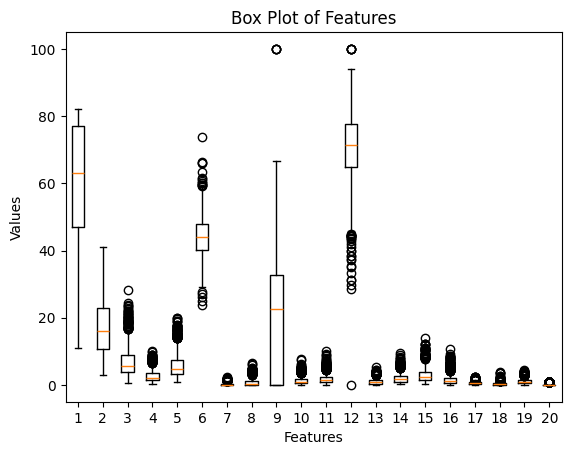

In [ ]:
# Create the boxplot
plt.boxplot(X)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Box Plot of Features')
plt.show()

## Feature Engineering

In [ ]:
from sklearn.preprocessing import StandardScaler

# Extract all columns except the last one
features = X.drop(columns= "injury")


In [ ]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the features
features_scaled = scaler.fit_transform(features)

In [ ]:
# Convert the scaled features back to a DataFrame
features_scaled = pd.DataFrame(features_scaled, columns=features.columns)

In [ ]:
# Combine the scaled features with the original last column
scaled_X = pd.concat([features_scaled, X.iloc[:, -1]], axis=1)
scaled_X

,games_played,minutes_played,points_per_game,field_goals_made,field_goal_attempts,field_goal_percent,3_point_made,3_point_attempt,3_point_percent,free_throw_made,free_throw_attempts,free_throw_percent,offensive_rebounds,defensive_rebounds,rebounds,assists,steals,blocks,turnovers,injury
0,-1.398311,1.168967,0.132575,-0.020957,0.472131,-1.543708,0.649913,1.235165,0.353943,0.300611,0.356743,-0.048885,-0.395570,1.009287,0.518091,0.230843,-0.536036,0.078908,0.143605,1
1,-1.455614,1.108994,0.086779,-0.376592,0.222045,-2.377791,1.169056,1.892467,0.260423,1.311857,1.186664,0.580258,-0.652272,-0.017303,-0.305780,1.448658,1.164606,0.312092,0.557161,0
2,0.779197,-0.282384,-0.371179,-0.376592,-0.333701,-0.317115,0.390342,0.859564,0.316535,-0.407260,-0.397730,-0.325326,-0.652272,-0.237286,-0.402706,-0.378065,-0.293087,-0.154277,-0.269952,0
3,-0.137649,-0.726185,-0.256689,-0.198774,-0.111402,-0.251697,-0.388372,-0.267238,0.204311,-0.407260,-0.397730,-0.144209,-0.010517,-0.823909,-0.548096,-0.513377,-0.050138,-0.620646,-0.269952,1
4,-0.710677,-0.738180,-0.531464,-0.613682,-0.806085,1.351052,-0.647944,-0.642839,-1.204727,-0.002762,0.054954,-0.287196,-0.010517,-0.383942,-0.257317,-0.851659,-0.778984,0.078908,-0.545656,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,1.123014,-0.222410,-0.577260,-0.613682,-0.639361,-0.137215,-0.647944,-0.548939,-0.313167,-0.103887,-0.246835,0.837635,-0.780622,-0.897236,-0.887337,0.636781,-0.050138,-0.387461,-0.545656,0
1314,0.435380,-0.606239,-0.668852,-0.672954,-0.500424,-1.363808,-0.388372,-0.079438,-0.163535,-0.508385,-0.624072,0.856700,-0.780622,-0.677253,-0.741948,0.501468,0.435759,-0.853830,0.143605,0
1315,-0.997191,-0.666212,-0.325383,-0.258047,-0.555999,1.776270,-0.647944,-0.736739,-1.204727,-0.306136,-0.171388,-0.582703,0.631237,0.202681,0.372702,-0.851659,-0.778984,0.078908,-0.407804,0
1316,-0.481466,-0.678207,-0.531464,-0.554409,-0.583786,-0.039087,-0.647944,-0.548939,-0.581259,-0.103887,-0.020493,-0.754287,-1.037324,-1.190548,-1.129652,0.433812,-0.536036,-0.620646,-0.545656,0


In [ ]:
scaled_X.shape

(1318, 20)

## Augment Dataset

In [ ]:
from imblearn.over_sampling import SMOTE
# Split the original data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
import numpy as np
# Function to add Gaussian noise to continuous features only
def add_noise(data, noise_level=0.01, exclude_columns=None):
    noisy_data = data.copy()

    # Apply noise only to continuous features, excluding specified columns (like 'injury')
    if exclude_columns:
        continuous_columns = data.drop(columns=exclude_columns).columns
        noisy_data[continuous_columns] = data[continuous_columns] + noise_level * np.random.normal(size=data[continuous_columns].shape)

    return noisy_data

In [ ]:
# Columns to exclude from noise addition (binary or categorical columns, such as 'injury')
exclude_columns = ['injury']

# Add noise to the SMOTE-resampled data, excluding the 'injury' column
noisy_X_resampled = add_noise(X_resampled, noise_level=0.01, exclude_columns=exclude_columns)


In [ ]:
from sklearn.utils import resample

# Combine features and target into one DataFrame for resampling
data_resampled = pd.concat([pd.DataFrame(noisy_X_resampled, columns=X_train.columns),
                            pd.Series(y_resampled, name='target')], axis=1)

# Optionally, resample the data to increase the dataset size further (oversampling to double the size)
augmented_data = resample(data_resampled, replace=True, n_samples=len(data_resampled) * 2, random_state=42)

# Split the resampled data back into features and target
features_augmented = augmented_data.drop(columns=['target'])
target_augmented = augmented_data['target']

# Optionally combine the augmented data with the original training data
X_train_augmented = pd.concat([X_train, features_augmented], axis=0)
y_train_augmented = pd.concat([y_train, target_augmented], axis=0)

# Shuffle the augmented training set
X_train_augmented, y_train_augmented = resample(X_train_augmented, y_train_augmented, random_state=42)

# Split the augmented training set into training and validation sets (80% train, 20% validation)
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_augmented, y_train_augmented, test_size=0.2, random_state=42)

# Print the shape of the original and augmented datasets
print("Original training set shape:", X_train.shape, y_train.shape)
print("Augmented training set shape:", X_train_augmented.shape, y_train_augmented.shape)

Original training set shape: (1054, 20) (1054,)
Augmented training set shape: (3666, 20) (3666,)


## Feature Selection and Stack Ensemble Model

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np

# CFS-based feature selection
def cfs_feature_selection(X, y, num_features):
    # Calculate mutual information
    mi = mutual_info_classif(X, y)
    # Select features with high mutual information
    selected_features = np.argsort(mi)[-num_features:]  # Select top features based on num_features
    return selected_features


In [ ]:
#import necessary libraries
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# Binary Bat Algorithm function for feature selection and classification
def binary_bat_algorithm(population_size, loudness, pulse_rate, max_iterations, features, X_train, y_train, X_val, y_val, X_test, y_test):
    # Bat Algorithm parameters
    min_frequency = 0
    max_frequency = 2
    dimension = len(features.columns)

    # Initialize the bat population
    frequency = np.zeros(population_size)
    velocity = np.zeros((population_size, dimension))
    solutions = np.random.randint(0, 2, (population_size, dimension))
    fitness = np.zeros(population_size)

    # Store convergence and accuracy over iterations
    convergence_curve = np.zeros(max_iterations)
    accuracy_curve = np.zeros(max_iterations)

    # Initialize early stopping variables
    best_accuracy = 0
    best_solution = None
    early_stop_count = 0  # Counter for early stopping

    # Base learners for stacking
    base_learners = [
        ('knn', KNeighborsClassifier()),
        ('svc', SVC(probability=True)),
        ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
        ('dtc', DecisionTreeClassifier(random_state=42))
    ]
    meta_learner = LogisticRegression()
    stack_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

    # Initial fitness calculation
    for i in range(population_size):
        selected_features = features.columns[solutions[i].astype(bool)]
        if len(selected_features) == 0:  # Correct check for empty
            fitness[i] = 0
        else:
            stack_model.fit(X_train[selected_features], y_train)
            y_pred = stack_model.predict(X_val[selected_features])
            fitness[i] = accuracy_score(y_val, y_pred)

    best_fitness = np.max(fitness)
    best_solution = solutions[np.argmax(fitness)].copy()
    best_accuracy = best_fitness  # Set initial best accuracy from fitness

    # Bat Algorithm iterations with early stopping based on accuracy
    for iteration in range(max_iterations):
        convergence_curve[iteration] = best_fitness
        accuracy_curve[iteration] = best_accuracy

        for i in range(population_size):
            # Update frequency, velocity, and solutions
            frequency[i] = min_frequency + (max_frequency - min_frequency) * np.random.rand()
            velocity[i] += (solutions[i] - best_solution) * np.random.rand()
            v_shaped_transfer_function = np.abs((2 / np.pi) * np.arctan((np.pi / 2) * velocity[i]))

            # Update solution based on transfer function and pulse rate
            solutions[i] = np.where(np.random.rand(dimension) < v_shaped_transfer_function,
                                    1 - solutions[i],
                                    solutions[i])
            if np.random.rand() > pulse_rate:
                solutions[i] = best_solution

            # Evaluate fitness
            selected_features = features.columns[solutions[i].astype(bool)]
            if len(selected_features) == 0:
                continue
            stack_model.fit(X_train[selected_features], y_train)
            y_pred = stack_model.predict(X_val[selected_features])
            current_accuracy = accuracy_score(y_val, y_pred)

            # Update if current solution is better
            if current_accuracy >= fitness[i] and np.random.rand() < loudness:
                fitness[i] = current_accuracy

            # Track best solution based on accuracy
            if current_accuracy > best_accuracy:
                best_solution = solutions[i].copy()
                best_accuracy = current_accuracy
                early_stop_count = 0  # Reset early stopping counter if improved
            elif current_accuracy == best_accuracy:
                early_stop_count += 1  # Increment early stopping counter if no improvement

        # Display Output
        print("Iteration:", iteration + 1)
        print("Selected Features:", features.columns[best_solution.astype(bool)].tolist())
        print("Best Accuracy:", best_accuracy, "\n")

        # Early stopping if accuracy does not improve for 3 consecutive iterations
        if early_stop_count >= 3:
            print(f"Early stopping at iteration {iteration + 1} due to no improvement in accuracy.")
            break

    # Final evaluation on test set
    selected_features = features.columns[best_solution.astype(bool)]
    stack_model.fit(X_train[selected_features], y_train)
    y_pred = stack_model.predict(X_test[selected_features])
    con_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Save the trained model as a .sav file
    model_filename = 'stack_model_best_solution.pkl'
    joblib.dump(stack_model, model_filename)
    print(f"Model saved as {model_filename}")

    return best_solution, best_accuracy, convergence_curve, accuracy_curve, con_matrix, report


In [ ]:
#call cfs function

num_features = 20
selected_features = cfs_feature_selection(X_train_final, y_train_final, num_features)
selected_features

array([19,  8,  7, 11, 16, 15,  6, 13, 18,  9, 17, 12,  0, 10, 14,  5,  2,
        4,  3,  1])

In [ ]:
# Apply selected features to training, validation, and test sets
X_train_selected = X_train_final.iloc[:, selected_features]
X_val_selected = X_val.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]

In [ ]:
# Set parameter for binary bat algorithm
population_size = 50  # Number of individuals in the population
loudness = 0.5         # Loudness of the bats
pulse_rate = 0.5       # Pulse rate of the bats
max_iterations = 5   # Maximum iterations

In [ ]:
# Run the binary bat algorithm
best_solution, best_fitness, convergence_curve, accuracy_curve, con_matrix, report = binary_bat_algorithm(
    population_size, loudness, pulse_rate, max_iterations, X_train_selected,
    X_train_selected, y_train_final, X_val_selected, y_val, X_test_selected, y_test)

Iteration: 1
Selected Features: ['injury', '3_point_percent', 'turnovers', 'free_throw_made', 'blocks', 'offensive_rebounds', 'free_throw_attempts', 'rebounds', 'field_goals_made']
Best Accuracy: 0.9809264305177112 

Early stopping at iteration 1 due to no improvement in accuracy.
Model saved as stack_model_best_solution.pkl


## Load Saved Model

In [ ]:
# Load the saved model
model_filename = '/content/stack_model_best_solution.pkl'
stack_model = joblib.load(model_filename)

In [ ]:
selected_features = ['injury', '3_point_percent', 'turnovers', 'free_throw_made', 'blocks', 'offensive_rebounds', 'free_throw_attempts', 'rebounds', 'field_goals_made']

In [ ]:
selected_features

[0, 1, 8, 10, 11, 12, 14, 15, 19]

## Evaluation/ Visualization

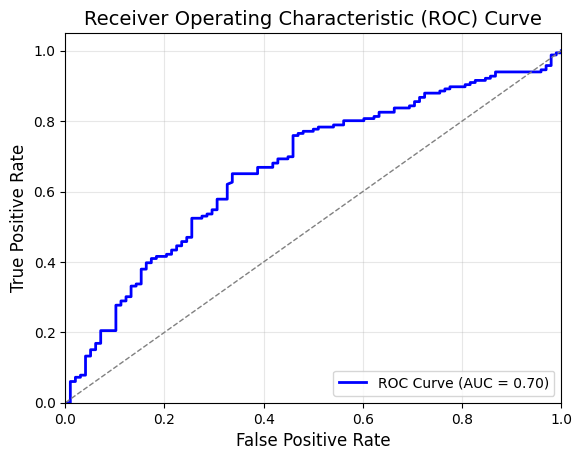

In [ ]:
from sklearn.metrics import roc_curve, auc
# Assuming `stack_model` is the trained model and `selected_features` are the chosen features
# Also assuming `X_test_scaled` and `y_test` are the test set
y_prob = stack_model.predict_proba(X_test_selected[selected_features])[:, 1]  # Probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = round(auc(fpr, tpr), 1)

# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.show()


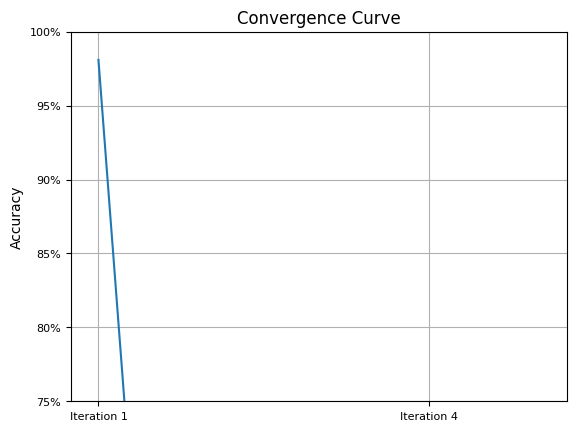

In [ ]:
# Check the length of accuracy_curve
num_points = len(accuracy_curve)

# Plot convergence curve
plt.plot(range(1, num_points + 1), accuracy_curve)
plt.title('Convergence Curve')
plt.ylabel('Accuracy')
plt.ylim(0.75, 1)
plt.xlim(0.75, num_points + 0.25)

# Set y-axis tick labels in percentage
yticks = plt.gca().get_yticks()
plt.gca().set_yticks(yticks)
plt.gca().set_yticklabels(['{:.0f}%'.format(y * 100) for y in yticks], fontsize=8)

# Set x-axis tick labels and ticks for the number of iterations
xticks = range(1, num_points + 1, 3)  # Set ticks every 3 iterations
plt.gca().set_xticks(xticks)
plt.gca().set_xticklabels(['Iteration {}'.format(x) for x in xticks], fontsize=8)

# Rotate xticks
plt.xticks(rotation=0)

plt.grid(True)
plt.show()


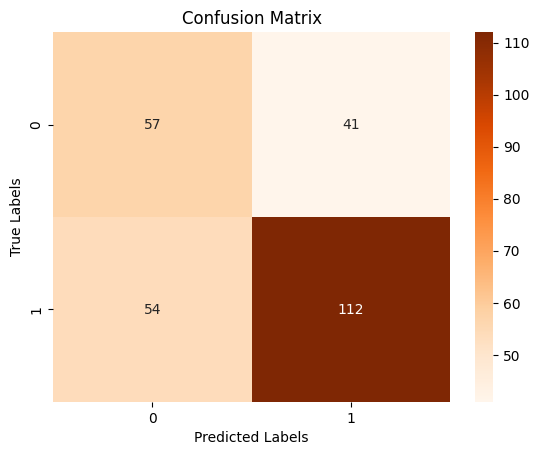

In [ ]:
# Visualize Confusion Matrix with integer formatting
sns.heatmap(con_matrix, annot=True, cmap="Oranges", fmt='g')  # 'fmt="g"' forces integer display
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()



In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.51      0.58      0.55        98
           1       0.73      0.67      0.70       166

    accuracy                           0.64       264
   macro avg       0.62      0.63      0.62       264
weighted avg       0.65      0.64      0.64       264



# **Testing the model on Sample Dataset**

In [ ]:
# Extract the first row of the test dataset (features only)
first_row = X_test.iloc[0:1]  # Select the first row (DataFrame format)
first_row

,games_played,minutes_played,points_per_game,field_goals_made,field_goal_attempts,field_goal_percent,3_point_made,3_point_attempt,3_point_percent,free_throw_made,free_throw_attempts,free_throw_percent,offensive_rebounds,defensive_rebounds,rebounds,assists,steals,blocks,turnovers,injury
677,-2.200551,-1.253949,-1.035218,-0.969317,-0.889446,-1.396517,-0.647944,-0.267238,-0.581259,-0.912883,-0.850414,-1.631275,-0.908973,-0.970564,-0.984263,-0.310408,-1.021933,-0.620646,-0.545656,0


In [ ]:
# Extract the first row of the dataset (features only)
first_row = X_test.iloc[0:1]  # Select the first row (DataFrame format)

# Ensure the row includes only the selected features
first_row_selected = first_row[selected_features]  # Filter by selected features


# Predict the class
predicted_class = stack_model.predict(first_row_scaled)[0]

# Predict the probability
predicted_prob = stack_model.predict_proba(first_row_scaled)

# Display the results
print("Selected Features:", selected_features)
print("Original Values:", first_row_selected.values)

print("Predicted Class:", predicted_class)
print("Predicted Probabilities:", predicted_prob)

Selected Features: ['injury', '3_point_percent', 'turnovers', 'free_throw_made', 'blocks', 'offensive_rebounds', 'free_throw_attempts', 'rebounds', 'field_goals_made']
Original Values: [[ 0.         -0.58125855 -0.54565596 -0.91288284 -0.62064582 -0.90897328
  -0.85041411 -0.98426289 -0.96931699]]
Predicted Class: 0
Predicted Probabilities: [[0.9458972 0.0541028]]
